In [19]:
import numpy as np
import pandas as pd

In [20]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
dataset = data.frame
targets = data.target_names
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    np.array(dataset[dataset.columns.drop(['target'])]),
    np.array(dataset['target']),
    test_size = 0.2,
    shuffle=True
)

In [23]:
from src.layers import BNormalizer

normalizer = BNormalizer(4)
normalizer.fit(x_train)


x_train = normalizer.predict(x_train)
x_test = normalizer.predict(x_test)

In [24]:
def one_hot_encode(labels, num_classes):
    # Создаем матрицу с нулями
    one_hot_targets = np.zeros((len(labels), num_classes), dtype=int)
    one_hot_targets[np.arange(len(labels)), labels] = 1
    return one_hot_targets

In [25]:
y_train, y_test = one_hot_encode(y_train, len(targets)), one_hot_encode(y_test, len(targets))

print(y_train.shape, y_test.shape)

(120, 3) (30, 3)


In [26]:
from src.model import BModel
from src.layers import BDenseLayer
from src.loss_function import zero_one

model = BModel([
    BDenseLayer(x_train.shape[1], 64),
    BDenseLayer(64, 128),
    BDenseLayer(128, 128),
    BDenseLayer(128, 128),
    #BDenseLayer(128, 64),
    #BDenseLayer(64, 32),
    #BDenseLayer(32, 16),
    BDenseLayer(128, 3)
], zero_one)

In [27]:
#from sklearn.neural_network import MLPClassifier

#model = MLPClassifier((32, 64), batch_size=32)

#model.fit(x_train, y_train)

In [28]:
#model.score(x_test, y_test)

In [29]:
y_test_1, y_test_2, y_test_3 = y_test[:, 0].reshape(-1, 1), y_test[:, 1].reshape(-1, 1), y_test[:, 2].reshape(-1, 1)

y_train_1, y_train_2, y_train_3 = y_train[:, 0].reshape(-1, 1), y_train[:, 1].reshape(-1, 1), y_train[:, 2].reshape(-1, 1)

In [30]:
print(np.count_nonzero(y_train_1), np.count_nonzero(y_train_2), np.count_nonzero(y_train_3))
EPOCHS = 1000

42 37 41


In [31]:
hist = model.fit(x_train, y_train, batch_size=16, meta_parameter_size=16, epochs=EPOCHS)

epoch : 1 loss : inf: 8it [00:00, 99.54it/s]
epoch : 2 loss : 0.4166666666666667: 8it [00:00, 99.73it/s]
epoch : 3 loss : 0.4166666666666667: 8it [00:00, 100.04it/s]
epoch : 4 loss : 0.625: 8it [00:00, 107.60it/s]
epoch : 5 loss : 0.5416666666666666: 8it [00:00, 109.82it/s]
epoch : 6 loss : 0.3333333333333333: 8it [00:00, 109.41it/s]
epoch : 7 loss : 0.5: 8it [00:00, 109.98it/s]
epoch : 8 loss : 0.4583333333333333: 8it [00:00, 108.39it/s]
epoch : 9 loss : 0.3333333333333333: 8it [00:00, 109.62it/s]
epoch : 10 loss : 0.5: 8it [00:00, 109.23it/s]
epoch : 11 loss : 0.3333333333333333: 8it [00:00, 109.23it/s]
epoch : 12 loss : 0.6666666666666666: 8it [00:00, 108.92it/s]
epoch : 13 loss : 0.4166666666666667: 8it [00:00, 100.95it/s]
epoch : 14 loss : 0.625: 8it [00:00, 108.76it/s]
epoch : 15 loss : 0.16666666666666666: 8it [00:00, 109.31it/s]
epoch : 16 loss : 0.16666666666666666: 8it [00:00, 109.15it/s]
epoch : 17 loss : 0.5833333333333334: 8it [00:00, 109.37it/s]
epoch : 18 loss : 0.375: 8

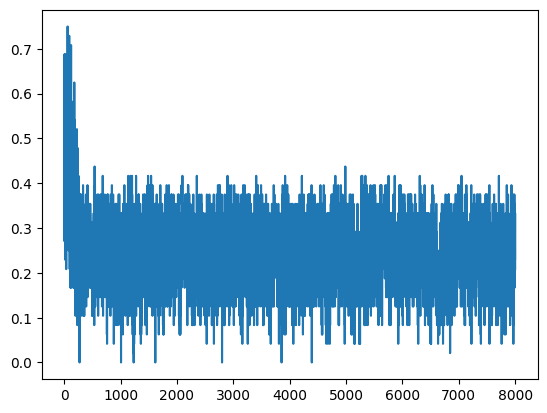

In [32]:
import matplotlib.pyplot as plt

plt.plot(hist['loss'])

In [33]:
print(min(hist['loss']), hist['loss'][-1])

0.0 0.20833333333333334


In [34]:
zero_one(model.predict(x_test), y_test)

np.float64(0.2777777777777778)

In [35]:
pred = model.predict(x_test)
print(np.concat([pred-y_test, np.sum(pred-y_test, axis=1).reshape(-1, 1) != 0 ], axis=1))
print(np.count_nonzero(np.sum(pred-y_test, axis=1).reshape(-1, 1) != 0), np.sum(pred-y_test, axis=1).shape)

[[ 0 -1  0  1]
 [ 1  0  0  1]
 [ 0  0 -1  1]
 [ 0  0  0  0]
 [ 0 -1  0  1]
 [ 0  0  0  0]
 [ 1 -1  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 1 -1  0  0]
 [ 0  0  0  0]
 [ 0 -1  1  0]
 [ 0 -1  0  1]
 [ 0 -1  0  1]
 [ 0  0  0  0]
 [ 0  0 -1  1]
 [ 0  0  0  0]
 [ 1  0  0  1]
 [ 1  0  0  1]
 [ 0 -1  0  1]
 [ 0  0 -1  1]
 [ 0  0  0  0]
 [-1  0  0  1]
 [ 0 -1  0  1]
 [ 1  0  0  1]
 [ 0 -1  0  1]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0 -1  1  0]
 [ 1 -1  0  0]]
15 (30,)
